## Spam Filtering

#### The GOAL is to classify the testing set for ham/spam. 
<br> TR-mails.zip FILES contains 2500 mails both in Ham(1721) labelled as 1 and Spam(779) labelled as 0.
<br> TT-mails.zip FILES contains 1827 mails both in Ham and Spam
<br> The file spam-mail.tr.label is the associated training labels.

In [11]:
import numpy as np
import os
XTrain = np.loadtxt('spam-mail.tr.label', skiprows=1, delimiter=',', dtype='str')
YTrain = XTrain[:,-1]
YTrain = YTrain.astype(np.int)
XTrainFileNames = XTrain[:,0]
XTestFileNames = XTrain[:1827,0]
print XTrainFileNames.shape, YTrain.shape, XTestFileNames.shape
print XTrainFileNames[:5],YTrain[:5]
trainFolder = os.getcwd()+os.sep+'TR-mails'+os.sep+'TR'+os.sep
testFolder = os.getcwd()+os.sep+'TT-mails'+os.sep+'TT'+os.sep
print trainFolder,testFolder
# with open(trainFolder+'TRAIN_'+XTrainFileNames[0]+'.eml','r') as f:
#     print f.readlines(),len(f.readlines())
    
# for sample in XTrain:
#     with open

(2500,) (2500,) (1827,)
['1' '2' '3' '4' '5'] [0 0 1 0 0]
/home/vishal/TUM/Anomaly Detection/Git Code/Anomaly-Detection/Challenges/Spam Filtering Challenge 4/TR-mails/TR/ /home/vishal/TUM/Anomaly Detection/Git Code/Anomaly-Detection/Challenges/Spam Filtering Challenge 4/TT-mails/TT/


In [12]:
import email
with open(trainFolder+'TRAIN_'+XTrainFileNames[0]+'.eml','r') as f:
#     print f.readlines(),len(f.readlines())
    message = email.message_from_file(f)
#     headers = email.message_from_file(f, headersonly)
print message#,headers
print type(message)#,type(headers)
#     parser = email.parser.Parser(f)
# print dir(parser)

From nobody Sat Dec 26 15:33:48 2015
Return-Path: ler@lerami.lerctr.org
Delivery-Date: Fri Sep 13 23:14:55 2002
Return-Path: <bengreen@mindupmerchants.com>
Received: from mindupmerchants.com
 (pDepriver@24-205-211-91.rno-cres.charterpipeline.net [24.205.211.91])
 by lerami.lerctr.org (8.12.2/8.12.2/20020902/$Revision: 1.30 $) with ESMTP id
 g8E4EZE9029281
 for <ler@lerctr.org>; Fri, 13 Sep 2002 23:14:48 -0500 (CDT)
Message-Id: <200209140414.g8E4EZE9029281@lerami.lerctr.org>
Received: from 192.168.0.0 by mindupmerchants.com
 with SMTP (MDaemon.PRO.v6.0.7.R)
 for <ler@lerctr.org>; Fri, 13 Sep 2002 21:13:21 -0700
From: "Ben Green" <bengreen@mindupmerchants.com>
To: ler@lerctr.org
Subject: One of a kind Money maker! Try it for free!
Date: Fri, 13 Sep 2002 21:13:19 -0700
X-M5MailerProjectID: 4fb0caa2-c329-4c20-b331-229e681acee3
Reply-To: bengreen@mindupmerchants.com
MIME-Version: 1.0
Content-Type: multipart/mixed;
	boundary="----000000000000000000000"
X-Return-Path: bengreen@mindupmerchants

In [13]:
print message.keys()
print message.values()
print message['Return-Path'], message['Message-Id']
print message['Received']
print message['Subject']

['Return-Path', 'Delivery-Date', 'Return-Path', 'Received', 'Message-Id', 'Received', 'From', 'To', 'Subject', 'Date', 'X-M5MailerProjectID', 'Reply-To', 'MIME-Version', 'Content-Type', 'X-Return-Path', 'X-MDaemon-Deliver-To', 'X-Virus-Scanned', 'X-Status', 'X-Keywords']
['ler@lerami.lerctr.org', 'Fri Sep 13 23:14:55 2002', '<bengreen@mindupmerchants.com>', 'from mindupmerchants.com (pDepriver@24-205-211-91.rno-cres.charterpipeline.net [24.205.211.91])\n\tby lerami.lerctr.org (8.12.2/8.12.2/20020902/$Revision: 1.30 $) with ESMTP id g8E4EZE9029281\n\tfor <ler@lerctr.org>; Fri, 13 Sep 2002 23:14:48 -0500 (CDT)', '<200209140414.g8E4EZE9029281@lerami.lerctr.org>', 'from 192.168.0.0 by mindupmerchants.com\n\twith SMTP (MDaemon.PRO.v6.0.7.R)\n\tfor <ler@lerctr.org>; Fri, 13 Sep 2002 21:13:21 -0700', '"Ben Green" <bengreen@mindupmerchants.com>', 'ler@lerctr.org', 'One of a kind Money maker! Try it for free!', 'Fri, 13 Sep 2002 21:13:19 -0700', '4fb0caa2-c329-4c20-b331-229e681acee3', 'bengreen

In [14]:
parser = email.parser.HeaderParser()
headers = parser.parsestr(message.as_string())
for h in headers.items():
    print h
print type(headers), dir(headers), len(headers)

('Return-Path', 'ler@lerami.lerctr.org')
('Delivery-Date', 'Fri Sep 13 23:14:55 2002')
('Return-Path', '<bengreen@mindupmerchants.com>')
('Received', 'from mindupmerchants.com\n (pDepriver@24-205-211-91.rno-cres.charterpipeline.net [24.205.211.91])\n by lerami.lerctr.org (8.12.2/8.12.2/20020902/$Revision: 1.30 $) with ESMTP id\n g8E4EZE9029281\n for <ler@lerctr.org>; Fri, 13 Sep 2002 23:14:48 -0500 (CDT)')
('Message-Id', '<200209140414.g8E4EZE9029281@lerami.lerctr.org>')
('Received', 'from 192.168.0.0 by mindupmerchants.com\n with SMTP (MDaemon.PRO.v6.0.7.R)\n for <ler@lerctr.org>; Fri, 13 Sep 2002 21:13:21 -0700')
('From', '"Ben Green" <bengreen@mindupmerchants.com>')
('To', 'ler@lerctr.org')
('Subject', 'One of a kind Money maker! Try it for free!')
('Date', 'Fri, 13 Sep 2002 21:13:19 -0700')
('X-M5MailerProjectID', '4fb0caa2-c329-4c20-b331-229e681acee3')
('Reply-To', 'bengreen@mindupmerchants.com')
('MIME-Version', '1.0')
('Content-Type', 'multipart/mixed;\n\tboundary="----000000000

In [15]:
import email
with open(trainFolder+'TRAIN_'+XTrainFileNames[0]+'.eml','r') as f:
#     print f.readlines(),len(f.readlines())
    message = email.message_from_file(f)
    # parser.parse()

### Spamicity of a word - Analyse the words of each email message against the classification labels.¶

In [16]:
from collections import Counter
def AnalyseWordLabelContribution(XMessages, YTrain):
    XFeaturesSpam = []
    XFeaturesHam = []
    i = 0
    for message in XMessages:
        if message == None: 
            continue
#             if YTrain[i] == 0:
#                 XFeaturesSpam.append((word, YTrain[i]))
#             else:
#                 XFeaturesHam.append((word, YTrain[i]))        
        else:
            wordList = message.split()
            for word in wordList:
                if(YTrain[i] == 0):
                    XFeaturesSpam.append((word.lower(), YTrain[i]))
                elif (YTrain[i] == 1):
                    XFeaturesHam.append((word.lower(), YTrain[i]))

            i+=1
    return Counter(XFeaturesSpam), Counter(XFeaturesHam)


In [17]:
# Compute Spamicity
def computeSpamicity(XFeaturesSpam, XFeaturesHam, noOfSpamWords = 20):
    XFeatures = {}
    for key in XFeaturesSpam.keys():
        word = key[0]
    #     print word, XFeaturesSpam[key], XFeaturesHam[(word, 1)]
        spamicity = float(XFeaturesSpam[key]) / float(XFeaturesSpam[key] + XFeaturesHam[(word, 1)])
        XFeatures[word] = spamicity

    # Sort and pick top most spam words as features
    from operator import itemgetter, attrgetter    
    descSortedFeatures = sorted(XFeatures.items(), key=itemgetter(1), reverse = True)

    # Select the top most frequent spam word
    spamWordsTaken = [x for x in descSortedFeatures[0:noOfSpamWords]]
    return spamWordsTaken

In [18]:
# Compute Spamicity for each word
def computeSpamicityWords(XFeaturesSpam, XFeaturesHam):
    XFeatures = {}
    for key in XFeaturesSpam.keys():
        word = key[0]
    #     print word, XFeaturesSpam[key], XFeaturesHam[(word, 1)]
        spamicity = float(XFeaturesSpam[key]) / float(XFeaturesSpam[key] + XFeaturesHam[(word, 1)])
#         hamicity = 1-spamicity
        XFeatures[word] = spamicity
    return XFeatures

In [19]:

# X = ['Why Spend upwards of $4000 on a DVD Burner when we will show you an alternative that will do the exact same thing for just a fraction of the cost? Copy your DVD\'s NOW. Best Price on the net. Click here: http://002@www.dvdcopyxp.com/cgi-bin/enter.cgi?marketing_id=dcx009 Click to remove http://003@www.spambites.com/cgi-bin/enter.cgi?spambytes_id=100115',
#      '> On 05/09/2010 03:49 PM, Merciadri Luca wrote:>> Ron Johnson wrote:>>> I just opened a new Writer 3.2.0-9+b1 document then selected the>>> "title image" http://i.space.com/images/080702-voyager-01.jpg from>>> http://www.space.com/missionlaunches/nasa-tracking-voyager2-problem-100506.html>>> and pasted it into the document.>> I am using OO 2.4.1.>> That\'s *really* old.  If you run Stable, then you should deinstall it> and get binaries from http://www.go-oo.orgOk. I will do it. Would it be that?>>                       Take for example>> http://en.wikipedia.org/wiki/California.>> Still works, although OOo doesn\'t seem to know how to handle svg> documents.Lucky you, but it must be because of the version. Note that it doesnot _always_ hang here, that\'s purely random.- -- Merciadri LucaSee http://www.student.montefiore.ulg.ac.be/~merciadri/',
#      'Enhance your desire, pleasure and performance! 100% GUARANTEED TO SEE AN INCREASE IN SIZE AND WIDTH http://pg.exqumloaf.com/']
# YTrain = [0,1,0]
# XFeaturesSpam, XFeaturesHam = AnalyseWordLabelContribution(X, YTrain)
# # print XFeaturesSpam

# spamWordsTaken = computeSpamicity(XFeaturesSpam, XFeaturesHam, 10)
# print spamWordsTaken


In [20]:
def extractEmailSubjects(folder,fileString, emailFileName):
    with open(folder+fileString+emailFileName+'.eml','r') as f:
        message = email.message_from_file(f)
    return message['Subject']


In [21]:
def readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_'):
    trainSubjects = []
    for fileName in XTrainFileNames:
        trainSubjects.append(extractEmailSubjects(trainFolder,fileString,fileName))
#     print len(trainSubjects)
#     print trainSubjects[:5]
    return trainSubjects
trainSubjects = readSubjects(XTrainFileNames, trainFolder, 'TRAIN_')
print len(trainSubjects)

2500


In [22]:
type(YTrain)
type(YTrain[0])
YTrain = YTrain.astype(np.int)
type(YTrain[0])

numpy.int64

In [23]:
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(trainSubjects, YTrain)
# print XFeaturesSpam

SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
print len(SubjectWordsSpamicity)
print SubjectWordsSpamicity

2113
{'-70%': 1.0, 'update.': 1.0, '$1.99': 1.0, 'oldest': 1.0, '$4,000/month': 1.0, 'increase': 1.0, 'penile': 1.0, 'trail)cokxwej': 1.0, 'casino,': 1.0, 'seriously': 0.5, 'winfrey': 0.75, '@': 1.0, 'updated': 0.1111111111111111, 'risk': 0.6666666666666666, 'today?': 1.0, 'internet': 0.23529411764705882, 'every': 0.42857142857142855, 'jacob': 1.0, 'today.': 0.5, 'wju': 1.0, 'tickets': 1.0, 'school': 0.25, 'propecia': 1.0, 'skills': 0.6666666666666666, 'problems,': 1.0, 'problems.': 0.6666666666666666, 'solution': 0.5, 'frozen': 1.0, 'crotch': 1.0, '#34': 1.0, 'exmh/nmh': 1.0, 'enjoy': 0.6666666666666666, '$19.99': 1.0, 'pulso': 1.0, 'tired': 0.3333333333333333, '$6.50': 1.0, 'direct': 1.0, '27.': 1.0, 'elegant': 1.0, 'her?': 1.0, 'currie': 1.0, 'errors': 0.25, '+': 0.09090909090909091, 'revolutionize': 1.0, 'fetish': 1.0, 'tips': 0.5, 'increasing': 0.3333333333333333, 'officially': 1.0, 'succumb': 1.0, 'args': 0.3333333333333333, 'never': 0.8, 'residual': 1.0, 'here': 0.75, 'hundreds'

In [24]:
count =0
for i in xrange(len(trainSubjects)):
    if trainSubjects[i]:
        count+=1
        print trainSubjects[i],YTrain[i]#,count,i

One of a kind Money maker! Try it for free! 0
link to my webcam you wanted  0
Re: How to manage multiple Internet connections? 1
[SPAM]  Give her 3 hour rodeo 0
Best Price on the netf5f8m1 0
linux.ie mailing list memberships reminder 1
Re: results for giant mass-check (phew) 1
Re: Fwd: Re: Kde 3.5 ... 1
[use Perl] Stories for 2002-08-31 1
Re: What to choose for Core i5 64 bits? 1
Re: Realtek ethernet (was Re: recent mobo recommendation) 1
[SPAM]  You gonna be the 1st 0
What a Sale, hibody! You save up to 75%. in the base and 0
Re: OOwriter always hangs, and then quits unexpectedly when images  are copied (copy/paste) from a website 1
Poker for money againts real players 0
Re: Amarok's Issues 1
Re: Kde 3.5 ... 1
Von Neumann's Best Friend, a bio-pet 1
Get the lowest possible interest rate for you--GUARANTEED. 0
How much do you really know about Fragmentation? 0
Re: exmh bug? 1
Apple & User Groups (was Re: AUGD: Re: PR Mailing Lists) 1
calling wayne baisley@#! 1
Apple: Heinous DVD Pirates

In [25]:
def computeSpamHamMetrics(message, wordSpamicity):
    spamInd =1.0
    hamInd =1.0
    if message == None:
        return 0.5,0.5
    else:
        wordList = message.split()
        for word in wordList:
            try:
                spamInd *= wordSpamicity[word.lower()]
                hamInd *= (1-wordSpamicity[word.lower()])
            except KeyError:
                spamInd *= 0.5
                hamInd *= 0.5
    return spamInd,hamInd    

In [26]:
def createSpamHamFeature(messages, wordSpamicity):
    XFeatures = []
    for message in messages:
        spam, ham = computeSpamHamMetrics(message, wordSpamicity)
        XFeatures.append([spam,ham])
    return np.array(XFeatures)

### Read the input data files.

### The email format description
 
The format of the .eml file is definde in RFC822, and information on recent 
standard of email, i.e., MIME (Multipurpose Internet Mail Extensions) can be
find in RFC2045-2049.


### Removing missing values from the Train Dataset 

### 

### Plot Histogram for Message Length of Spam and Ham

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def PlotCharCountInMsg(XMessages, YTrain):
    XMessagesLength = []
    for message in XMessages:
        if message is None:
            XMessagesLength.append(0)
        else:
            XMessagesLength.append(len(message))
            
#     XMessagesLength = [len(message) for message in XMessages]
    messageNos = [i+1 for i in xrange(0,len(XMessagesLength))]

    pos = np.arange(len(messageNos))
    width = 0.05     # gives histogram aspect to the bar diagram

    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(YTrain)

    plt.xlabel('Messages')
    plt.ylabel('Character Count')
    plt.title('Analysis of Distribution of Character Count in SPAM/HAM Messages.')
    plt.grid(True)

    # add a 'best fit' line

    plt.bar(pos, XMessagesLength, width, color='b')
    plt.show()

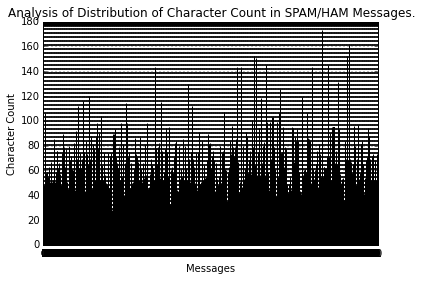

In [56]:
PlotCharCountInMsg(trainSubjects, YTrain)

### Analyze Importance of Capital Letters in Spam Messages

In [59]:
def AnalyzeCapitalLettersInMsg(XMessages, minLetteredWord = 3):
    countCapitalsInMsg = []
    for msg in XMessages:
        countCapitals = 0
        if not msg is None:
            wordList = msg.split()
            for word in wordList:
                if word.isupper() and len(word) > minLetteredWord:
                    countCapitals += 1
    #                 print word, True
        countCapitalsInMsg.append(countCapitals)
    return countCapitalsInMsg

In [60]:
countCapitalsInMsg = AnalyzeCapitalLettersInMsg(trainSubjects,3)
print countCapitalsInMsg

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 7, 0, 0, 0, 4, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 

### Features based on the Presence/Absence of a particular substring in the message.

In [65]:
def ChkPresenceOfStringFeat(XMessages, strXContainsList):
    XPGPSignFeature = []
    for msg in XMessages:
        if not msg is None:
            count = 0
            for strXContains in strXContainsList:
                count = msg.lower().count(strXContains)
                if (count>0):
                    break
            if (count>0):
                XPGPSignFeature.append(1)
            else:
                XPGPSignFeature.append(0)
            
    return XPGPSignFeature

### Presence/Absence of PGP SIGNATURE in the message body as a feature

In [66]:
ChkPresenceOfStringFeat(trainSubjects, "PGP SIGNATURE")

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [67]:
strSpamWordsList =  ["[spam]", "sex", "viagra", "money", "prize", "lottery", "jackpot", "replica"]
ChkPresenceOfStringFeat(trainSubjects, strSpamWordsList)

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


### Use different classifiers to train the model.

In [67]:
#Naive Bayes Classifier
##http://airccse.org/journal/jcsit/0211ijcsit12.pdf
def classifySpamHam(XTrain, XTest, YTrain, YTest, params):
#     print XTest.shape, XTrain.shape, YTrain.shape, YTest.shape
    folder = params['folder']
    fileString = params['fileString']
    XTrainSubjects = readSubjects(XTrain, folder, fileString)
    XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
    SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
#     print len(SubjectWordsSpamicity)
#     print SubjectWordsSpamicity
#     for subject in XTrainSubjects:
#         spam,ham = computeSpamHamMetrics(subject)
    XTestSubjects = readSubjects(XTest, folder, fileString)
    YPred = []
    for subject in XTestSubjects:
        spam, ham = computeSpamHamMetrics(subject,SubjectWordsSpamicity)
        if spam > ham:
            YPred.append(0)
        else:
            YPred.append(1)
    YPred = np.array(YPred)    
#     print YPred.shape
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)


In [93]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest,trees=100,crit='gini'):
def classifyRandomForestClassifier(XTrain, XTest, YTrain, YTest, params):
    trees = params['trees']
    crit = params['criterion']
    seed = params['random_state']
    clf = RandomForestClassifier(n_estimators=trees,criterion=crit, random_state=seed )
    clf.fit(XTrain, YTrain)
    YPred = clf.predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [98]:
# Multi Class SVM
from sklearn import svm
def classifyMultiClassSVMClassifier(XTrain, XTest, YTrain, YTest, params):
    ker = params['kernel']
    YPred = svm.SVC(kernel=ker).fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

In [99]:
# K Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
def classifyKNNClassifier(XTrain, XTest, YTrain, YTest, params):
    neighbours = params['neighbours']
    neigh = KNeighborsClassifier(n_neighbors=neighbours)
    YPred = neigh.fit(XTrain, YTrain).predict(XTest)
    diff = YPred - YTest
    score = diff[diff == 0].size
    return (100.0 * score)/(YPred.size)

### Stratified K Fold Cross Validation

In [48]:
from sklearn.cross_validation import StratifiedKFold
def stratifiedKFoldVal(XTrain, YTrain, classify, params):
    n_folds = 5
    score = 0.0
    skf = StratifiedKFold(YTrain, n_folds)
    for train_index, test_index in skf:
        X_train, X_test = XTrain[train_index], XTrain[test_index]
        y_train, y_test = YTrain[train_index], YTrain[test_index]
        score += classify(X_train, X_test,  y_train, y_test, params)
    return score/n_folds

In [121]:
params = {'folder':trainFolder,'fileString':'TRAIN_'}
score = stratifiedKFoldVal(XTrainFileNames, YTrain, classifySpamHam, params)
print score
XTrainSubjects = readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
XTestSubjects = readSubjects(XTestFileNames, testFolder, fileString='TEST_')
YPred = []
for subject in XTestSubjects:
    spam, ham = computeSpamHamMetrics(subject,SubjectWordsSpamicity)
    if spam > ham:
        YPred.append(0)
    else:
        YPred.append(1)
YPred = np.array(YPred)    
writePredictedLabelFile(YPred)

87.3623792095


In [119]:
XTrainSubjects = readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
XTrainSubjectFeatures = createSpamHamFeature(XTrainSubjects, SubjectWordsSpamicity)
print XTrainSubjectFeatures.shape
print XTrainSubjectFeatures[:5]

params = {'trees':200, 'criterion':'entropy', 'random_state':None}
score = stratifiedKFoldVal(XTrainSubjectFeatures, YTrain, classifyRandomForestClassifier, params)
print score

XTestSubjects = readSubjects(XTestFileNames, testFolder, fileString='TEST_')
XTestSubjectFeatures = createSpamHamFeature(XTestSubjects, SubjectWordsSpamicity)
print XTestSubjectFeatures.shape
print XTestSubjectFeatures[:5]

clf = RandomForestClassifier(n_estimators=200,criterion='entropy')
clf.fit(XTrainSubjectFeatures, YTrain)
YPred = clf.predict(XTestSubjectFeatures)
writePredictedLabelFile(YPred)

(2500, 2)
[[  5.57871157e-04   1.83329509e-04]
 [  1.41154168e-02   0.00000000e+00]
 [  9.30416200e-06   1.94081426e-01]
 [  5.08641975e-01   0.00000000e+00]
 [  4.52483370e-02   0.00000000e+00]]
93.5531825327
(1827, 2)
[[ 0.01929326  0.23070674]
 [ 0.00482331  0.05767669]
 [ 0.01929326  0.23070674]
 [ 0.21992481  0.        ]
 [ 0.03853348  0.09343434]]


In [120]:
XTrainSubjects = readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
XTrainSubjectFeatures = createSpamHamFeature(XTrainSubjects, SubjectWordsSpamicity)
# print XTrainSubjectFeatures.shape
# print XTrainSubjectFeatures[:5]

params = {'neighbours':21}
score = stratifiedKFoldVal(XTrainSubjectFeatures, YTrain, classifyKNNClassifier, params)
print score

XTestSubjects = readSubjects(XTestFileNames, testFolder, fileString='TEST_')
XTestSubjectFeatures = createSpamHamFeature(XTestSubjects, SubjectWordsSpamicity)
# print XTestSubjectFeatures.shape
# print XTestSubjectFeatures[:5]

neighbours = params['neighbours']
neigh = KNeighborsClassifier(n_neighbors=neighbours)
YPred = neigh.fit(XTrainSubjectFeatures, YTrain).predict(XTestSubjectFeatures)
writePredictedLabelFile(YPred)

94.9939847759


### Write Predicted Output Labels to File

In [87]:
def writePredictedLabelFile(YPred):
    f = open("Predictions.csv","w")
    f.write("Id,Prediction" + "\n")
    for i in xrange(len(YPred)):
        f.write(str(i+1) + "," + str(int(YPred[i]))+ "\n")
    f.close()

### Selection of Nearest Neighbours for KNN

In [109]:

selectNeighbourScores = []

params = {'neighbours':2}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':3}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':4}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':5}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':10}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':18}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':20}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':21}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

params = {'neighbours':22}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyKNNClassifier, params)
print score
selectNeighbourScores.append(score)

print selectNeighbourScores

92.9545430182
94.513743655
94.3141438166
94.7539036556
95.0342242969
95.3142249369
95.4343852575
95.5943858975
95.5143858975
[92.95454301817207, 94.5137436549746, 94.31414381657525, 94.75390365561462, 95.03422429689718, 95.31422493689975, 95.43438525754104, 95.5943858975436, 95.51438589754358]


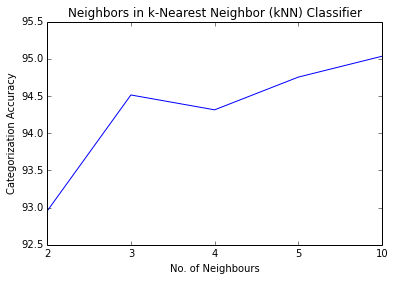

In [103]:
# Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectNeighbourScores, label = "Neighbors in k-Nearest Neighbor (kNN) Classifier")
plt.title("Neighbors in k-Nearest Neighbor (kNN) Classifier")

labels = [2,3,4,5,10]
plt.xticks(np.arange(len(labels)), labels, rotation='horizontal')
# plt.title("Optimal choice of Neighbors in k-Nearest Neighbor (kNN) Classifier")
plt.ylabel('Categorization Accuracy')
plt.xlabel('No. of Neighbours')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Hence, we choose k =  for our nearest neighbor classifier.

### Selection of Parameters for Random Forest

In [95]:
XTrainSubjects = readSubjects(XTrainFileNames, trainFolder, fileString='TRAIN_')
XFeaturesSubjectSpam, XFeaturesSubjectHam = AnalyseWordLabelContribution(XTrainSubjects, YTrain)
SubjectWordsSpamicity = computeSpamicityWords(XFeaturesSubjectSpam, XFeaturesSubjectHam)
XTrainSubjectFeatures = createSpamHamFeature(XTrainSubjects, SubjectWordsSpamicity)

XTestSubjects = readSubjects(XTestFileNames, testFolder, fileString='TEST_')
XTestSubjectFeatures = createSpamHamFeature(XTestSubjects, SubjectWordsSpamicity)

XTrainFeatures = XTrainSubjectFeatures
newYTrain = YTrain

In [96]:

selectRandomForestScores = []

params = {'trees':200, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':100, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':500, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':50, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':150, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':250, 'criterion':'entropy', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':200, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':100, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':500, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':50, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':150, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

params = {'trees':250, 'criterion':'gini', 'random_state':40}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyRandomForestClassifier, params)
print score
selectRandomForestScores.append(score)

print selectRandomForestScores

93.4331023724
93.3529420518
93.3931023724
93.4328622114
93.3931023724
93.3931023724
93.3530222121
93.3129420518
93.3531023724
93.1930218921
93.3129420518
93.3530222121
[93.4331023724095, 93.35294205176821, 93.39310237240949, 93.43286221144885, 93.39310237240949, 93.39310237240949, 93.35302221208885, 93.3129420517682, 93.3531023724095, 93.19302189208756, 93.3129420517682, 93.35302221208885]


In [97]:
# Plotting the results
import matplotlib.pyplot as plt
#%matplotlib inline
plt.plot(selectRandomForestScores, label = "Random Forest Classifier")
plt.title("Random Forest Classifier")

labels = ['200 Trees + entropy', '100 Trees + entropy', '500 Trees + entropy', '50 Trees + entropy', '150 Trees + entropy','250 Trees + entropy',
          '200 Trees + gini', '100 Trees + gini', '500 Trees + gini', '50 Trees + gini','150 Trees + gini','250 Trees + gini']

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Parameters')
# Place a legend to the right of this smaller figure.
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Selection of Kernel for Multi Class SVM

In [100]:

selectKernelScores = []

params = {'kernel':'poly'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

params = {'kernel':'linear'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

params = {'kernel':'rbf'}
score = stratifiedKFoldVal(XTrainFeatures, newYTrain, classifyMultiClassSVMClassifier, params)
print score
selectKernelScores.append(score)

73.1977956712
84.7946898988
84.9946898988


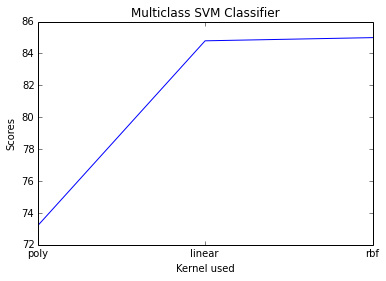

In [101]:
# Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(selectKernelScores, label = "Multiclass SVM Classifier")

labels = ['poly','linear','rbf']
plt.title("Multiclass SVM Classifier")
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='horizontal')

plt.ylabel('Scores')
plt.xlabel('Kernel used')
# Place a legend to the right of this smaller figure.
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Graphs depicting Categorization Accuracy scores on KFold Stratified Validation on Train data for:

In [12]:
print scoreRandomForestClassifier
print scoreKNNClassifier
print scoreMultiClassSVMClassifier# Plotting the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scoreRandomForestClassifier, label = "Random Forest Classifier")
plt.plot(scoreMultiClassSVMClassifier, label = "Multiclass Linear SVM Classifier")
plt.plot(scoreKNNClassifier, label = "KNN Classifier")

labels = ['Limited AVs(Binary Encoding)', 'All AVs(Binary Encoding)', 'All AVs(Frequency Encoding)', 'PE Info(Entropy Mean)', 
          'All AVs(Binary Encoding) + Entropy Mean','All AVs(Frequency Encoding) + Entropy Mean']

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(np.arange(len(labels)), labels, rotation='vertical')

plt.ylabel('Scores')
plt.xlabel('Feature Encoding used')
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

NameError: name 'scoreRandomForestClassifier' is not defined

## Final evaluation results on Kaggle

### Bar graph depicting Public vs Private Categorization Accuracy Scores on the different Models.

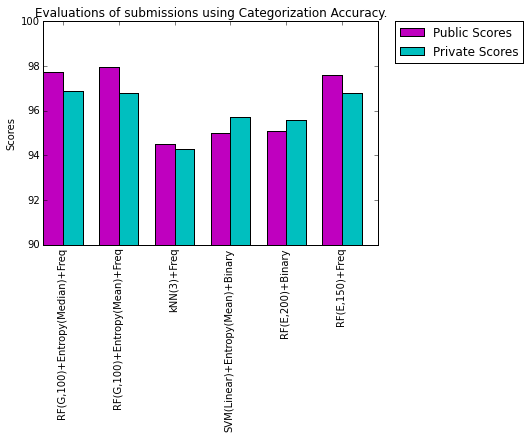

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 6
publicScore = (97.733, 97.971, 94.511, 94.988, 95.107, 97.613)
privateScore = (96.897, 96.778, 94.272, 95.704, 95.585, 96.778,)
modelNames = ('RF(G,100)+Entropy(Median)+Freq', 'RF(G,100)+Entropy(Mean)+Freq', 'kNN(3)+Freq', 
              'SVM(Linear)+Entropy(Mean)+Binary', 'RF(E,200)+Binary', 'RF(E,150)+Freq')

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, publicScore, width, color='m')

rects2 = ax.bar(ind + width, privateScore, width, color='c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Evaluations of submissions using Categorization Accuracy.')
ax.set_xticks(ind + width)
ax.set_xticklabels(modelNames,  rotation='vertical')
ax.set_ylim(90,100)

# def autolabel(rects):
#     # attach some text labels
#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

# Place a legend to the right of this smaller figure.
ax.legend((rects1[0], rects2[0]), ('Public Scores', 'Private Scores'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Hence we conclude that the best model is Random Forest with Gini as criterion and 100 Trees using ... with Entropy Mean/Median and ... as features !